# Modelo Poisson

Juan Sosa PhD

Email:   jcsosam@unal.edu.co

GitHub:  https://github.com/jstats1702 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tabulate import tabulate
from scipy.stats import gamma
from scipy.stats import norm

# Modelo

El modelo para **variables de conteo** $y_i\in \mathbb{N}_0$, para $i = 1,\ldots,n$, está dado por
$$
\begin{align*}
	y_i\mid\theta &\stackrel{\text{iid}}{\sim}\textsf{Poisson}(\theta) \\
	\theta &\sim p(\theta)
\end{align*}
$$
donde $\theta\in \Theta = \mathbb{R}^+$.

Este modelo es potencialmente **restrictivo** por la **relación media-varianza**: $\textsf{E}(y_i\mid\theta) = \textsf{Var}(y_i\mid\theta) = \theta$. 

Alternativas: 

- Distribución Binomial Negativa (sobre-dispersión, varianza superior a la esperada).
- Distribución Comway-Maxwell-Poisson (sub-dispersión, varianza menor a la esperada).

La **distribución muestral** de $\boldsymbol{y} = (y_1,\ldots,y_n)$ dado $\theta$ es
$$
p(\boldsymbol{y}\mid\theta) = \prod_{i=1}^n \frac{\theta^{y_i}\,e^{-\theta}}{y_i!} = \frac{1}{\prod_{i=1}^n y_i!}\,\theta^{s}e^{-n\theta}\,,
$$
donde $s= \textstyle\sum_{i=1}^n y_i$, lo cual sugiere que $s$ es un **estadístico suficiente** para $\theta$.

Dado que las $y_i$'s son condicionalmente i.i.d. dado $\theta$ y $s$ es un estadístico suficiente para $\theta$, entonces se tiene el modelo equivalente
$$
\begin{align*}
	s\mid\theta &\sim \textsf{Poisson}(n\theta) \\
	\theta &\sim p(\theta) 
\end{align*}
$$
donde $s\in\mathcal{Y} = \mathbb{N}_0$.

# Modelo Gamma-Poisson

La familia de distribuciones **Gamma** es **conjugada** para la distribución muestral **Poisson**.

Así, el **modelo Gamma-Poisson** es
$$
\begin{align*}
	s\mid\theta&\stackrel{\text{iid}}{\sim}\textsf{Poisson}(n\theta) \\
	\theta &\sim \textsf{Gamma}(a,b)
\end{align*}
$$
donde $a$ y $b$ son los **hiperparámetros** del modelo. 

## Distribución posterior

**(Ejercicio.)** Bajo el **modelo Gamma-Poisson** se tiene que la **distribución posterior** de $\theta$ es
$$
\theta \mid s \sim \textsf{Gamma}(\theta\mid a + s, b+n)\,.
$$

## Distribución marginal

**(Ejercicio.)** La **distribución marginal** de $s$ es 
$$
p(s) = \frac{\Gamma(a+n)}{\Gamma(a)\,\Gamma(s+1)}\left( \frac{b}{b+1}\right)^a\left(\frac{1}{b+1}\right)^s\,,\quad s\in\mathbb{N}_0\,.
$$

Esta distribución se conoce como **distribución Gamma Poisson** con parámetros $n\in\mathbb{N}$, $a>0$ y $b>0$, lo que se denota con $y\sim\textsf{Gamma-Poisson}(n,a,b)$.

## Media posterior

La **media posterior** es
$$
        \textsf{E}(\theta\mid s) = \frac{a+s}{b+n} = \frac{b}{b+n}\cdot \frac{a}{b}+\frac{n}{b+n}\cdot \frac{s}{n}\,,
$$
la cual es un **promedio ponderado** de la media previa $\textsf{E}(\theta) = \frac{a}{a+b}$ y la media muestral $\bar{y} = \frac{s}{n}$ con pesos proporcionales a $b$ y $n$, respectivamente. 

Esta expresión conlleva a la siguiente interpretación de los hiperparámetros:

- $b$ = número previo de observaciones.
- $a$ = suma de los conteos asociados con las $b$ observaciones previas.
- Si $n>>b$, entonces la mayoría de la información proviene de los datos en lugar de la información previa.

## Predicción

**(Ejercicio.)** La **distribución predictiva posterior** de una observación futura $y^*\in\mathbb{N}_0$ es
$$
y^*\mid s \sim \textsf{BN}(a+s,b+n)
\quad\Longleftrightarrow\quad
p(y^*\mid s) = \frac{\Gamma(y^* +a+s)}{\Gamma(a+s)\Gamma(y^*+1)}\left[\frac{b+n}{b+n+1}\right]^{a+s} \left[\frac{1}{b+n+1}\right]^{y^*}\,.
$$

La variable aleatoria $x$ tiene distribución **Binomial Negativa** con parámetros $\alpha,\beta > 0$, i.e., $X\sim\textsf{BN}(\alpha,\beta)$, si su función de masa de probabilidad es
$$
p(x\mid\alpha,\beta) = \frac{\Gamma(x+\alpha)}{\Gamma(\alpha)\,\Gamma(x+1)}\,\left[\frac{\beta}{\beta+1}\right]^{\alpha}\,\left[\frac{1}{\beta+1}\right]^x\,,\quad x\in\mathbb{N}_0\,.
$$

Se tiene que $\theta$ (el objetivo inferencial) y $y^*$ (el objetivo predictivo) tienen la misma media post
erior, pero la varianza posterior de $y^*$ es mayor:
$$
\textsf{E}(\theta\mid\boldsymbol{y}) = \textsf{E}(y^*\mid\boldsymbol{y}) = \frac{a+s}{b+n}\,,
$$
mientras que 
$$
\textsf{Var}(\theta\mid\boldsymbol{y}) = \frac{a+s}{b+n}\left(0 + \frac{1}{b+n}\right)
\qquad\text{y}\qquad
\textsf{Var}(y^*\mid\boldsymbol{y}) = \frac{a+s}{b+n}\left(1 + \frac{1}{b+n}\right)\,.
$$

# Ejemplo: Número de hijos y educación

**Censo Nacional de Población y Vivienda - CNPV - 2018** está disponible en este [enlace](https://microdatos.dane.gov.co/index.php/catalog/643/study-description). 

Diccionario de datos (`ddi-documentation-spanish-643.pdf`) está disponible en este [enlace](https://microdatos.dane.gov.co/index.php/catalog/643/datafile/F11).

La base de datos contiene la información de una **muestra aleatoria simple de personas** que residen en hogares particulares o personas que residen en lugares especiales de alojamiento con las características correspondientes al censo.

Se quiere modelar el **número de hijos** de personas con las siguientes características: mujer, jefa de hogar, entre 40 y 44 años, alfabetizada, nacida en Colombia, residente en Colombia hace cinco años, sin pertenencia a ningún grupo étnico y que reporta si tiene hijos o no.

¿Existen diferencias significativas en las tasas promedio del **número de hijos** entre mujeres de 40 a 44 años con y sin educación superior?

## Tratamiento de datos

Se consideran personas identificadas como: mujer, jefe de hogar, 40 a 44 años, alfabeta, lugar de nacimiento en Colombia, lugar de residencia hace 5 años en Colombia, ningún grupo étnico, informa si tiene hijos o no.

In [5]:
# Datos
df = pd.read_csv("CNPV2018.txt")

# Dimensiones
print(df.shape)

(71814, 48)


In [6]:
# Recodificación del nivel educativo
# 0: Sin educación superior (preescolar a técnico)
# 1: Con educación superior (universitario o posgrado)
df['P_NIVEL_ANOSR'] = np.where(df['P_NIVEL_ANOSR'].isin([8, 9]), 1, 0).astype(int)

In [7]:
# Frecuencias: indicadora de educación superior
# PA1_THNV: Hijos(as) nacidos vivos
df['P_NIVEL_ANOSR'].value_counts().sort_index()

P_NIVEL_ANOSR
0    55569
1    16245
Name: count, dtype: int64

In [8]:
# Recodificación: sin hijos (NA → 0)
df['PA1_THNV'] = (
    pd.to_numeric(df['PA1_THNV'], errors='coerce')  # ensure numeric, set non-numeric to NaN
      .fillna(0)                                    # replace NaN with 0
      .astype(int)                                  # make sure the column is integer
)

In [9]:
# Frecuencias: número de hijos
df['PA1_THNV'].value_counts().sort_index()

PA1_THNV
0     51390
1      6091
2      7009
3      3984
4      1719
5       709
6       363
7       200
8       128
9        82
10       45
11       18
12       24
13       16
14        5
15        8
18        1
99       22
Name: count, dtype: int64

In [10]:
# Remover datos faltantes codificados como 99
df = df[(df['P_NIVEL_ANOSR'] != 99) & (df['PA1_THNV'] != 99)]

In [11]:
# Definir filtro de selección
filtro = (
    (df['P_PARENTESCOR'] == 1) &
    (df['P_SEXO'] == 2) &
    (df['P_EDADR'] == 9) &
    (df['PA1_GRP_ETNIC'] == 6) &
    (df['PA_LUG_NAC'].isin([2, 3])) &
    (df['PA_VIVIA_5ANOS'].isin([2, 3])) &
    (df['PA_HNV'].isin([1, 2])) &
    (df['P_ALFABETA'] == 1)
)

# Filtrar datos y extraer número de hijos según nivel educativo
y1 = df.loc[filtro & (df['P_NIVEL_ANOSR'] == 0), 'PA1_THNV'].astype(int).values  # Sin educación superior
y2 = df.loc[filtro & (df['P_NIVEL_ANOSR'] == 1), 'PA1_THNV'].astype(int).values  # Con educación superior

In [12]:
# Tamaños de muestra
n1 = len(y1)
print(n1)

n2 = len(y2)
print(n2)

# Estadísticos suficientes
s1 = y1.sum()
print(s1)

s2 = y2.sum()
print(s2)

360
110
762
127


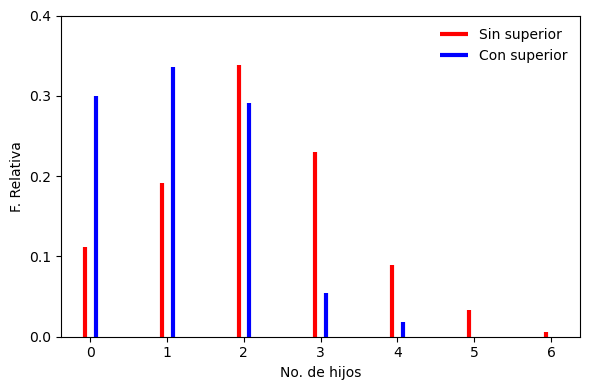

In [13]:
# Distribución de frecuencias
y = np.arange(0, 7)

# Frecuencias relativas
freq_y1 = np.array([np.sum(y1 == i) for i in y]) / n1
freq_y2 = np.array([np.sum(y2 == i) for i in y]) / n2

# Configuración del gráfico
plt.figure(figsize=(6, 4))
plt.ylim(0, 0.4)

# Gráfico de barras tipo "h" (líneas verticales)
plt.vlines(y - 0.07, 0, freq_y1, colors='red', linewidth=3, label='Sin superior')
plt.vlines(y + 0.07, 0, freq_y2, colors='blue', linewidth=3, label='Con superior')

# Etiquetas y leyenda
plt.xlabel("No. de hijos")
plt.ylabel("F. Relativa")
plt.legend(loc='upper right', frameon=False)
plt.xticks(y)
plt.yticks(np.linspace(0, 0.4, 5))
plt.tight_layout()
plt.show()

## Distribución posterior

In [15]:
# Previa Gamma(2,1)
a = 2
b = 1

# Media previa de theta
print(round(a / b, 3))

# CV previo de theta
cv = np.sqrt(a / b**2) / (a / b)
print(round(cv, 3))

# Parámetros de la distribución posterior de theta
ap1 = a + s1
bp1 = b + n1
ap2 = a + s2
bp2 = b + n2

2.0
0.707


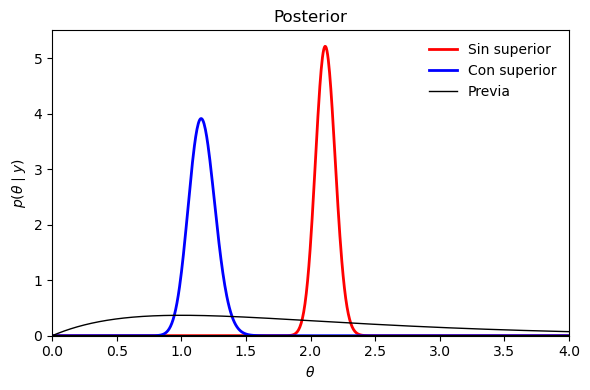

In [16]:
# Configuración del gráfico
theta = np.linspace(0, 5, 1000)

# Distribución posterior
plt.figure(figsize=(6, 4))
plt.xlim(0, 4)
plt.ylim(0, 5.5)

# Etiquetas y título
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta \mid y)$')
plt.title("Posterior")

# Densidades: posterior sin/con educación superior y previa
plt.plot(theta, gamma.pdf(theta, a=ap1, scale=1/bp1), color='red', linewidth=2, label="Sin superior")
plt.plot(theta, gamma.pdf(theta, a=ap2, scale=1/bp2), color='blue', linewidth=2, label="Con superior")
plt.plot(theta, gamma.pdf(theta, a=a, scale=1/b), color='black', linewidth=1, label="Previa")

# Línea base
plt.axhline(0, color='black')

# Leyenda
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.show()

In [17]:
# Media posterior de theta
theta_hat_1 = ap1 / bp1
theta_hat_2 = ap2 / bp2 

# Coeficiente de variación (CV) posterior de theta
cv_1 = 1 / np.sqrt(ap1)
cv_2 = 1 / np.sqrt(ap2)

# Intervalo de credibilidad al 95% para theta
ic95_1 = gamma.ppf([0.025, 0.975], a=ap1, scale=1/bp1)
ic95_2 = gamma.ppf([0.025, 0.975], a=ap2, scale=1/bp2)

# Probabilidad posterior de theta > 2
pr_theta_1 = gamma.sf(2, a=ap1, scale=1/bp1)  # sf = 1 - cdf
pr_theta_2 = gamma.sf(2, a=ap2, scale=1/bp2)

# Tabla de resultados
tab = pd.DataFrame({
    "Sin superior": [theta_hat_1, cv_1, ic95_1[0], ic95_1[1], pr_theta_1],
    "Con superior": [theta_hat_2, cv_2, ic95_2[0], ic95_2[1], pr_theta_2]
}, index=["Media", "CV", "Q2.5%", "Q97.5%", "Pr. > 2"])

# Mostrar tabla con formato 'github'
print(tabulate(tab.round(3), headers='keys', tablefmt='github',
               showindex=True, stralign='center', numalign='center'))

|         |  Sin superior  |  Con superior  |
|---------|----------------|----------------|
|  Media  |     2.116      |     1.162      |
|   CV    |     0.036      |     0.088      |
|  Q2.5%  |     1.969      |      0.97      |
| Q97.5%  |     2.269      |     1.371      |
| Pr. > 2 |     0.938      |       0        |


## Comparación de grupos


In [19]:
# Muestras de la distribución posterior de theta
np.random.seed(123)
th1_mc = np.random.gamma(shape=ap1, scale=1/bp1, size=10000)
th2_mc = np.random.gamma(shape=ap2, scale=1/bp2, size=10000)

In [20]:
# Muestras de la distribución posterior de eta = theta_1 - theta_2
eta = th1_mc - th2_mc

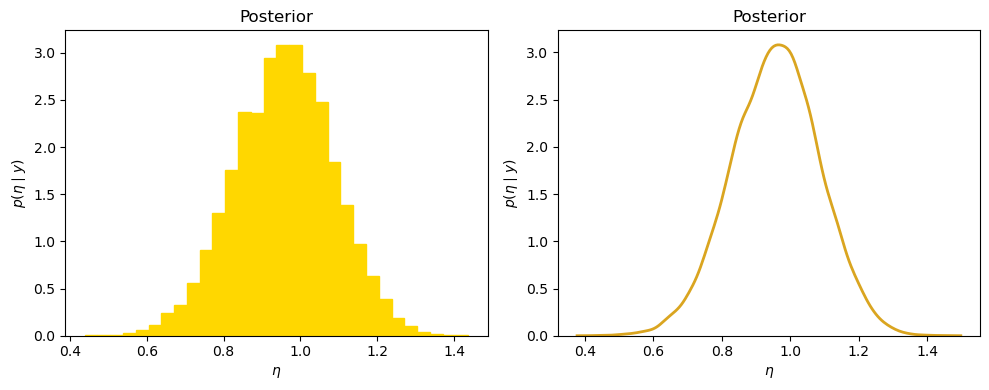

In [21]:
# Configuración del gráfico: 1 fila, 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histograma de la distribución posterior
axes[0].hist(eta, bins=30, density=True, color='gold', edgecolor='gold')
axes[0].set_xlabel(r'$\eta$')
axes[0].set_ylabel(r'$p(\eta \mid y)$')
axes[0].set_title("Posterior")

# Densidad de la distribución posterior
sns.kdeplot(eta, ax=axes[1], color='goldenrod', linewidth=2)
axes[1].set_xlabel(r'$\eta$')
axes[1].set_ylabel(r'$p(\eta \mid y)$')
axes[1].set_title("Posterior")

# Ajustar diseño
plt.tight_layout()
plt.show()

In [22]:
# Media posterior de eta = theta_1 - theta_2
print("Media:", round(np.mean(eta), 3))

# Coeficiente de variación posterior de eta
print("CV:", round(np.std(eta) / np.mean(eta), 3))

# Intervalo de credibilidad al 95% para eta
ic95_eta = np.quantile(eta, [0.025, 0.975])
print("IC 95%:", np.round(ic95_eta, 3))

# Probabilidad posterior de que eta > 0
print("Pr(eta > 0):", round(np.mean(eta > 0), 3))


Media: 0.957
CV: 0.134
IC 95%: [0.701 1.204]
Pr(eta > 0): 1.0


In [23]:
# Inferencia Bayesiana
est_B = np.mean(eta)
cv_B  = np.std(eta) / est_B
ic_B  = np.quantile(eta, [0.025, 0.975])

# Inferencia frecuentista: Asintótica
yb1 = np.mean(y1)
yb2 = np.mean(y2)
sd1 = np.std(y1, ddof=1)
sd2 = np.std(y2, ddof=1)

est_F1 = yb1 - yb2
se_F1  = np.sqrt(sd1**2 / n1 + sd2**2 / n2)
cv_F1  = se_F1 / est_F1
z_975  = norm.ppf(0.975)
ic_F1  = est_F1 + np.array([-1, 1]) * z_975 * se_F1

# Inferencia frecuentista: Bootstrap paramétrico
np.random.seed(123)
out_param = np.array([
    np.mean(np.random.poisson(yb1, size=n1)) - np.mean(np.random.poisson(yb2, size=n2))
    for _ in range(10000)
])

est_F2 = np.mean(out_param)
cv_F2  = np.std(out_param) / est_F2
ic_F2  = np.quantile(out_param, [0.025, 0.975])

# Inferencia frecuentista: Bootstrap no paramétrico
np.random.seed(123)
out_nonparam = np.array([
    np.mean(np.random.choice(y1, size=n1, replace=True)) -
    np.mean(np.random.choice(y2, size=n2, replace=True))
    for _ in range(10000)
])

est_F3 = np.mean(out_nonparam)
cv_F3  = np.std(out_nonparam) / est_F3
ic_F3  = np.quantile(out_nonparam, [0.025, 0.975])

In [24]:
# Resultados en tabla
tab = pd.DataFrame([
    [est_B,  cv_B,  ic_B[0],  ic_B[1]],
    [est_F1, cv_F1, ic_F1[0], ic_F1[1]],
    [est_F2, cv_F2, ic_F2[0], ic_F2[1]],
    [est_F3, cv_F3, ic_F3[0], ic_F3[1]]
], columns=["Estimación", "CV", "Límite Inf.", "Límite Sup."],
   index=["Bayesiana", "Frec. Asintótica", "Frec. Bootstrap Par.", "Frec. Bootstrap No Par."])

# Mostrar tabla con formato tipo kable
print(tabulate(tab.round(3), headers='keys', tablefmt='github',
               showindex=True, stralign='center', numalign='center'))

|                         |  Estimación  |  CV   |  Límite Inf.  |  Límite Sup.  |
|-------------------------|--------------|-------|---------------|---------------|
|        Bayesiana        |    0.957     | 0.134 |     0.701     |     1.204     |
|    Frec. Asintótica     |    0.962     | 0.119 |     0.737     |     1.187     |
|  Frec. Bootstrap Par.   |    0.962     | 0.131 |     0.71      |     1.208     |
| Frec. Bootstrap No Par. |    0.963     | 0.117 |     0.741     |     1.186     |


## Inferencia otros quinquenios

In [26]:
# Parámetros de la distribución previa Gamma(2,1)
a = 2
b = 1

# Inicialización del almacenamiento de resultados
np.random.seed(123)
out = np.empty((10, 6))

# Iteración sobre los grupos de edad de 20–24 a 65–69 (P_EDADR códigos 5 a 14)
for i, k in enumerate(range(5, 15)):  # CORREGIDO
    # Filtrado de datos
    mask = (
        (df['P_PARENTESCOR'] == 1) &
        (df['P_SEXO'] == 2) &
        (df['PA1_GRP_ETNIC'] == 6) &
        (df['PA_LUG_NAC'].isin([2, 3])) &
        (df['PA_VIVIA_5ANOS'].isin([2, 3])) &
        (df['PA_HNV'].isin([1, 2])) &
        (df['P_ALFABETA'] == 1) &
        (df['P_EDADR'] == k)
    )

    y1 = df.loc[mask & (df['P_NIVEL_ANOSR'] == 0), 'PA1_THNV'].astype(int).values
    y2 = df.loc[mask & (df['P_NIVEL_ANOSR'] == 1), 'PA1_THNV'].astype(int).values

    # Tamaños de muestra y estadísticos suficientes
    n1, s1 = len(y1), y1.sum()
    n2, s2 = len(y2), y2.sum()

    # Parámetros de la posterior
    ap1, bp1 = a + s1, b + n1
    ap2, bp2 = a + s2, b + n2

    # Muestras de la distribución posterior
    th1_mc = np.random.gamma(shape=ap1, scale=1/bp1, size=10000)
    th2_mc = np.random.gamma(shape=ap2, scale=1/bp2, size=10000)

    # Inferencia Bayesiana
    diff_mc = th1_mc - th2_mc
    est = np.mean(diff_mc)
    cv = np.std(diff_mc) / est
    ic95 = np.quantile(diff_mc, [0.025, 0.975])
    ic99 = np.quantile(diff_mc, [0.005, 0.995])

    # Almacenamiento
    out[i, :] = [est, cv, ic95[0], ic95[1], ic99[0], ic99[1]]

# Etiquetas de filas y columnas (CORREGIDAS)
index_labels = [f"{a}-{b}" for a, b in zip(range(20, 70, 5), range(24, 74, 5))]
columns_labels = ["Estimación", "CV", "Q2.5%", "Q97.5%", "Q0.5%", "Q99.5%"]

# Crear DataFrame
results_df = pd.DataFrame(out, columns=columns_labels, index=index_labels)

# Mostrar tabla con las primeras cuatro columnas
print(tabulate(results_df.iloc[:, :4].round(3), headers="keys", tablefmt="github",
               showindex=True, stralign="center", numalign="center"))

|       |  Estimación  |  CV   |  Q2.5%  |  Q97.5%  |
|-------|--------------|-------|---------|----------|
| 20-24 |    0.539     | 0.133 |  0.401  |  0.686   |
| 25-29 |    0.853     | 0.103 |  0.684  |  1.028   |
| 30-34 |    1.016     | 0.105 |  0.807  |  1.222   |
| 35-39 |    1.115     | 0.104 |  0.885  |  1.341   |
| 40-44 |    0.954     | 0.133 |  0.697  |  1.198   |
| 45-49 |    1.116     | 0.13  |  0.828  |  1.395   |
| 50-54 |    0.989     | 0.14  |  0.712  |  1.253   |
| 55-59 |    1.162     | 0.132 |  0.861  |  1.455   |
| 60-64 |    1.153     | 0.143 |  0.823  |  1.468   |
| 65-69 |    0.871     | 0.218 |  0.493  |  1.235   |


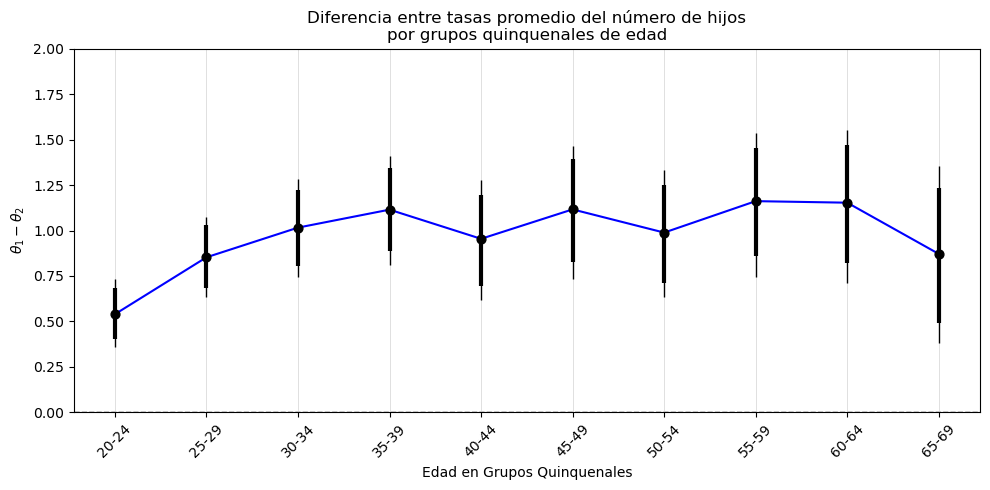

In [27]:
# Extraer componentes de resultados
x = np.arange(1, len(results_df) + 1)
media = results_df["Estimación"]
ic95_inf = results_df["Q2.5%"]
ic95_sup = results_df["Q97.5%"]
ic99_inf = results_df["Q0.5%"]
ic99_sup = results_df["Q99.5%"]
etiquetas = results_df.index.tolist()

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.ylim(0, 2)

# Puntos de estimación
plt.scatter(x, media, color='black', s=40, zorder=3, label="Estimación")

# Línea de tendencia
plt.plot(x, media, color='blue', linewidth=1.5, zorder=2)

# Líneas de referencia horizontales y verticales
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
for xi in x:
    plt.axvline(x=xi, color='lightgray', linewidth=0.5)

# Intervalos de credibilidad
plt.vlines(x, ic95_inf, ic95_sup, color='black', linewidth=3, label='IC 95%')
plt.vlines(x, ic99_inf, ic99_sup, color='black', linewidth=1, label='IC 99%')

# Etiquetas del eje X
plt.xticks(ticks=x, labels=etiquetas, rotation=45)
plt.xlabel("Edad en Grupos Quinquenales")
plt.ylabel(r"$\theta_1 - \theta_2$")
plt.title("Diferencia entre tasas promedio del número de hijos\npor grupos quinquenales de edad")
plt.tight_layout()
plt.grid(False)
plt.show()

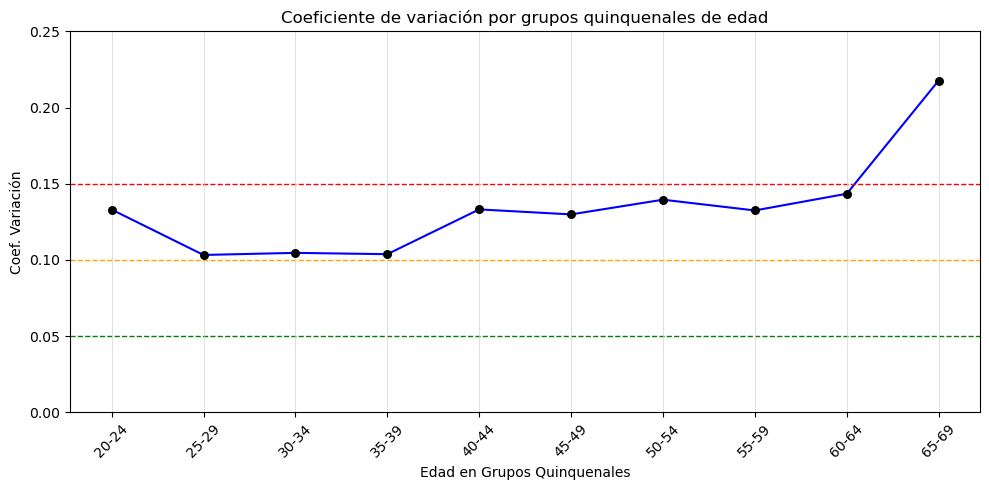

In [28]:
# Coordenadas y valores
x = np.arange(1, len(results_df) + 1)
cv = results_df["CV"]
etiquetas = results_df.index.tolist()

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.ylim(0, 0.25)

# Puntos y línea de tendencia
plt.plot(x, cv, color='blue', linewidth=1.5, zorder=2, label="Coef. Variación")
plt.scatter(x, cv, color='black', s=30, zorder=3)

# Líneas horizontales de referencia
plt.axhline(0.05, linestyle='dashed', color='green', linewidth=1)
plt.axhline(0.10, linestyle='dashed', color='#FFA500', linewidth=1)  # Naranja
plt.axhline(0.15, linestyle='dashed', color='red', linewidth=1)

# Líneas verticales de referencia (una por grupo)
for xi in x:
    plt.axvline(x=xi, color='lightgray', linewidth=0.5)

# Ejes y etiquetas
plt.xticks(ticks=x, labels=etiquetas, rotation=45)
plt.xlabel("Edad en Grupos Quinquenales")
plt.ylabel("Coef. Variación")
plt.title("Coeficiente de variación por grupos quinquenales de edad")
plt.tight_layout()
plt.grid(False)
plt.show()

# Ejercicios conceptuales

- Sea $y \mid \theta \sim \textsf{Bin}(n, \theta)$ y $x \mid \theta \sim \textsf{Bin}(m, \theta)$, con $\theta \sim \textsf{Beta}(a, b)$. Determine la distribución predictiva de $y$ dado $x$.

- Sea $y \mid \theta \sim \textsf{Poisson}(\theta)$.  

  a. Obtenga la distribución previa de Jeffreys para $\theta$. ¿Esta distribución previa es propia?  
  b. Obtenga la distribución posterior correspondiente y determine las condiciones sobre $y$ que garantizan que esta distribución sea propia.

- El estimador óptimo del parámetro $\theta \in \Theta \subset \mathbb{R}$ bajo la regla de Bayes es el estimador $\hat\theta = \hat\theta(\boldsymbol{y})$ que minimiza la pérdida esperada posterior, definida como  
$$
\textsf{E}_{\theta\mid\boldsymbol{y}}(L(\theta,\hat\theta)) = \int_{\Theta} L(\theta,\hat\theta)\, p(\theta\mid\boldsymbol{y})\, \textsf{d}\theta\,,
$$
donde $L(\theta,\hat\theta)$ es la función de pérdida que cuantifica el costo de estimar $\theta$ mediante $\hat\theta$, y $\boldsymbol{y} = (y_1, \dots, y_n)$ representa los datos observados.  

  a. Demuestre que si la función de pérdida es cuadrática, es decir, $L(\theta, \hat\theta) = (\theta - \hat\theta)^2$, entonces el estimador óptimo según la regla de Bayes es la media posterior, es decir, $\hat\theta = \textsf{E}(\theta \mid \boldsymbol{y})$.  
  b. Demuestre que si la función de pérdida es absoluta, es decir, $L(\theta, \hat\theta) = |\theta - \hat\theta|$, entonces el estimador óptimo según la regla de Bayes es la mediana posterior, es decir, $\hat\theta = (\theta\mid\boldsymbol{y})_{0.5}$.  
  c. El riesgo frecuentista $R_{\textsf{F}}(\theta,\hat\theta)$ se define como  
    $$
    R_{\textsf{F}}(\theta,\hat\theta) = \textsf{E}_{\boldsymbol{y}\mid\theta}(L(\theta,\hat\theta)) = \int_{\mathcal{Y}} L(\theta,\hat\theta)\, p(\boldsymbol{y}\mid\theta)\,\textsf{d}\boldsymbol{y}\,,
    $$
    es decir, el valor esperado de la función de pérdida $L(\theta,\hat\theta)$ sobre todos los valores posibles de los datos $\boldsymbol{y} \in \mathcal{Y}$. Por otro lado, el riesgo Bayesiano $R_{\textsf{B}}(\theta,\hat\theta)$ se define como  
    $$
    R_{\textsf{B}}(\theta,\hat\theta) = \textsf{E}_{\theta}(R_{\textsf{F}}(\theta,\hat\theta)) = \int_{\Theta} R_{\textsf{F}}(\theta,\hat\theta)\, p(\theta)\,\textsf{d}\theta\,,
    $$
    es decir, el valor esperado del riesgo frecuentista $R_{\textsf{F}}(\theta,\hat\theta)$ respecto a la distribución previa de $\theta$. Demuestre que  
    $$
    R_{\textsf{B}}(\theta,\hat\theta) = \textsf{E}_{\boldsymbol{y}}(\textsf{E}_{\theta\mid\boldsymbol{y}}(L(\theta,\hat\theta)))\,,
    $$
    donde $\textsf{E}_{\boldsymbol{y}}(\cdot)$ denota la esperanza respecto a la distribución marginal $p(\boldsymbol{y})$.

- Considere el modelo Gamma-Poisson, donde las observaciones $y_i \mid \theta \overset{\text{iid}}{\sim} \textsf{Poisson}(\theta)$ para $i = 1, \dots, n$, y el parámetro $\theta$ sigue una distribución gamma previa $\theta \sim \textsf{Gamma}(a, b)$. Se adopta la función de pérdida cuadrática $L(\theta, \hat{\theta}) = (\theta - \hat{\theta})^2$.  

  a. Demuestre que el estimador que minimiza la pérdida esperada posterior tiene la forma $\hat\theta = a + b \bar{y}$, donde $a > 0$, $b \in (0,1)$ y $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$.  
  b. Calcule el riesgo frecuentista tanto del estimador $\hat\theta$ como del estimador de máxima verosimilitud.  
  c. Determine el riesgo Bayesiano del estimador $\hat\theta$.

- Considere el modelo Beta-Binomial, donde la variable aleatoria $x \mid \theta \sim \textsf{Bin}(n, \theta)$ y el parámetro $\theta$ sigue una distribución previa $\theta \sim \textsf{Beta}(\sqrt{n}/2, \sqrt{n}/2)$. Encuentre el estimador que minimiza la pérdida esperada posterior bajo la función de pérdida cuadrática $L(\theta, \hat\theta) = (\theta - \hat\theta)^2$ y demuestre que su riesgo frecuentista es constante.

- Suponga que $y_i \mid \boldsymbol{\theta} \overset{\text{iid}}{\sim} p(y_i \mid \boldsymbol{\theta})$ para $i = 1, \dots, n$, donde $\boldsymbol{\theta} \sim p(\boldsymbol{\theta})$, con $\boldsymbol{\theta} = (\theta_1, \dots, \theta_k)$ y $\boldsymbol{y} = (y_1, \dots, y_n)$.  

    Sea $\boldsymbol{\theta}_\text{MAP}$ el estimador de **máximo a posteriori** (MAP), definido como el valor de $\boldsymbol{\theta}$ que maximiza la distribución posterior:
    $$
    \boldsymbol{\theta}_\text{MAP} = \underset{\boldsymbol{\theta}}{\textsf{arg max}} \, \log p(\boldsymbol{\theta} \mid \boldsymbol{y}) = \underset{\boldsymbol{\theta}}{\textsf{arg max}} \, \left(\log p(\boldsymbol{y} \mid \boldsymbol{\theta}) + \log p(\boldsymbol{\theta})\right).
    $$
    Además, considere la matriz de covarianza aproximada $\mathbf\Sigma_\text{MAP} = -\mathbf{H}^{-1}$, donde $\mathbf{H}$ es la matriz Hessiana de la log-verosimilitud posterior, cuya entrada $(i,j)$ está dada por:
    $$
    H_{i,j} = \frac{\partial^2}{\partial\theta_i \, \partial\theta_j} \, \log p (\boldsymbol{\theta} \mid \boldsymbol{y}) \Bigg|_{\boldsymbol{\theta}=\boldsymbol{\theta}_\text{MAP}} = \frac{\partial^2}{\partial\theta_i \, \partial\theta_j} \, \left(\log p(\boldsymbol{y} \mid \boldsymbol{\theta}) + \log p(\boldsymbol{\theta})\right) \Bigg|_{\boldsymbol{\theta}=\boldsymbol{\theta}_\text{MAP}}.
    $$
    Dado que la constante de normalización $p(\boldsymbol{y})$ no depende de $\boldsymbol{\theta}$, esta no afecta la maximización de $\log p(\boldsymbol{\theta} \mid \boldsymbol{y})$.
    
    El Teorema del Límite Central Bayesiano (BCLT, por sus siglas en inglés) establece que, cuando $n \to \infty$, la distribución posterior de $\boldsymbol{\theta}$ puede aproximarse mediante una distribución normal multivariada:
    $$
    \boldsymbol{\theta} \mid \boldsymbol{y} \approx \textsf{N}_k(\boldsymbol{\theta}_\text{MAP},\mathbf\Sigma_\text{MAP}).
    $$
    Usando los datos del caso de víctimas de violencia sexual, aproxime la distribución posterior de $\theta$ mediante el BCLT. Compare la distribución exacta y la aproximada dibujándolas en un mismo gráfico.

# Ejercicios prácticos

- La siguiente tabla presenta el número de accidentes aéreos mortales registrados anualmente en aerolíneas de todo el mundo durante un período de diez años (Fuente: *Statistical Abstract of the United States*). Se asume que el número de accidentes mortales en cada año es condicionalmente independiente y sigue una distribución de Poisson con parámetro $\theta$.

  | Año        | 1976 | 1977 | 1978 | 1979 | 1980 | 1981 | 1982 | 1983 | 1984 | 1985 |
  |:---------- |:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
  | Accidentes |  24  |  25  |  31  |  31  |  22  |  21  |  26  |  20  |  16  |  22  |

  a. Defina una distribución previa para $\theta$ y justifique su elección.  
  b. Determine la distribución posterior de $\theta$ con base en los datos observados de 1976 a 1985.  
  c. Bajo este modelo, calcule un intervalo predictivo del 95% para el número de accidentes fatales en 1986.

- Un laboratorio de investigación en cáncer estudia la tasa de tumorogénesis en dos cepas de ratones, A y B. Se han registrado los recuentos de tumores en 10 ratones de la cepa A y 13 de la cepa B. Los ratones de tipo A han sido ampliamente investigados, y estudios previos indican que sus recuentos de tumores siguen aproximadamente una distribución de Poisson con media 12. En contraste, la tasa de tumorogénesis en los ratones de tipo B es desconocida, aunque esta cepa está relacionada con la cepa A. Los recuentos de tumores observados en cada grupo son:
$$
\boldsymbol{y}_A = (12, 9, 12, 14, 13, 13, 15, 8, 15, 6), \quad
\boldsymbol{y}_B = (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7).
$$

  a. Determine las distribuciones posteriores, medias, varianzas e intervalos de credibilidad del 95% basados en cuantiles para $\theta_A$ y $\theta_B$, asumiendo que los recuentos de tumores en cada grupo siguen distribuciones de Poisson independientes y que las distribuciones previas están dadas por:
  $$
  \theta_A \sim \textsf{Gamma}(120,10), 
  \quad \theta_B \sim \textsf{Gamma}(12,1).
  $$

  b. Calcule y grafique la esperanza posterior de $\theta_B$ considerando la distribución previa 
  $$
  \theta_B \sim \textsf{Gamma}(12\,n_0, n_0)
  $$
  para cada $n_0 \in \{1, 2, \dots, 50\}$. Analice qué configuraciones de la distribución previa de $\theta_B$ serían necesarias para que su esperanza posterior se aproxime a la de $\theta_A$.

  c. Evalúe si la información sobre la población A debería afectar las inferencias sobre la población B. Analice la pertinencia de asumir independencia entre $\theta_A$ y $\theta_B$, es decir, 
  $$
  p(\theta_A, \theta_B) = p(\theta_A) \, p(\theta_B),
  $$
  considerando la relación entre ambas cepas y la posible influencia de este supuesto en las estimaciones.

- Un investigador del Departamento de Ingeniería Electrónica y Eléctrica de la Universidad de Bath (Inglaterra) analizó datos sobre los tiempos de falla de un tipo específico de alambre metálico. En este contexto, el tiempo de falla se define como el número de veces que una máquina puede tensionar el alambre antes de que se rompa. Se dispone de los siguientes $n = 14$ tiempos de falla de un experimento:
$$
\boldsymbol{y} = (495, 541, 1461, 1555, 1603, 2201, 2750, 3468, 3516, 4319, 6622, 7728, 13159, 21194).
$$

  El modelo más simple para describir los datos asume que los tiempos de falla siguen una distribución exponencial, es decir:

  $$
  y_i \mid \lambda \overset{\text{iid}}{\sim} \textsf{Exp}(\lambda), 
  \quad \textsf{E}(y_i \mid \lambda) = \lambda, 
  \quad i = 1, \dots, n.
  $$

  a. Sea $X \sim \textsf{Gamma}(\alpha, \beta)$, con $\alpha > 0$ y $\beta > 0$. Encuentre la función de densidad de probabilidad de $Y = \frac{1}{X}$. La distribución de $Y$ se denomina distribución gamma inversa con parámetros $\alpha$ y $\beta$, lo que se denota como $Y \sim \textsf{GI}(\alpha, \beta)$.  

  b. Determine la distribución posterior de $\lambda$, asumiendo que la distribución previa es 
  $$
  \lambda \sim \textsf{GI}(a, b), \quad a > 0, \quad b > 0.
  $$

  c. Demuestre que la media posterior de $\lambda$ es un promedio ponderado entre la media previa $\textsf{E}(\lambda)$ y la media muestral 
  $$
  \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i.
  $$

  d. Se dispone de información externa de otro experimento que sugiere que la distribución previa de $\lambda$ debe tener una media $\mu_0 = 4500$ y una desviación estándar $\sigma_0 = 1800$. Grafique en un mismo gráfico las distribuciones previa y posterior de $\lambda$, utilizando un rango de valores de 1000 a 12000 en el eje horizontal e identificando qué curva corresponde a cada densidad.

  e. Demuestre que el estimador de máxima verosimilitud (MLE) de $\lambda$ y la información observada de Fisher son, respectivamente:

  $$
  \hat\lambda_{\text{MLE}} = \bar{y}
  \qquad \text{y} \qquad
  \hat{I}(\hat\lambda_{\text{MLE}}) = \frac{n}{\bar{y}^2}.
  $$

  Recordando que la información observada de Fisher se define como

  $$
  \hat{I}(\hat\lambda_{\text{MLE}}) = \left[ -\frac{\partial^2}{\partial\lambda^2} \log p(\boldsymbol{y} \mid \lambda) \right]_{\lambda = \hat\lambda_{\text{MLE}}},
  $$

  donde $p(\boldsymbol{y} \mid \lambda) = \prod_{i=1}^{n} p(y_i \mid \lambda)$ representa la función de verosimilitud de la muestra.

  f. Obtenga la estimación puntual, el coeficiente de variación y un intervalo de credibilidad o confianza al 95% para $\lambda$ bajo los enfoques Bayesiano y frecuentista, considerando los siguientes métodos: Normalidad asintótica del MLE, Bootstrap paramétrico, Bootstrap no paramétrico.

  Sugerencia: Recuerde que asintóticamente se tiene que 
  $$
  \hat\lambda_{\text{MLE}} \sim \textsf{N}(\lambda, \hat{I}^{-1}(\hat\lambda_{\text{MLE}})).
  $$


# Referencias

Hoff, P. D. (2009). *A First Course in Bayesian Statistical Methods*. Springer New York.

Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). *Bayesian Data Analysis* (3rd ed.). Chapman & Hall/CRC.